In [7]:
# import  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
file_path = 'data_files/AB_NYC_2019.csv'

# Load the dataset
df = pd.read_csv(file_path)

print("Data loaded successfully!")
print(df.head())

Data loaded successfully!
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149             

In [15]:
# technical summary
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review    

In [17]:
# Let's see the missing value counts clearly
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [19]:
# fill 'reviews_per_month' with 0.
df.fillna({'reviews_per_month': 0}, inplace=True)

# The 'last_review' column is crucial for finding the busiest times, convert to datetime object.
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')


In [21]:
# drop a few columns not needed
df.drop(['id', 'host_name', 'name'], axis=1, inplace=True)

#  confirm  cleaning 
print("\nMissing values after cleaning:")
print(df.isnull().sum())



Missing values after cleaning:
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [23]:
print("\nData types after cleaning:")
print(df.dtypes['last_review']) # Check if the date conversion worked


Data types after cleaning:
datetime64[ns]


In [25]:
# extract the month from the 'last_review' column.
# drop rows where the date is missing to avoid errors.
df_temporal = df.dropna(subset=['last_review']).copy()
df_temporal['month'] = df_temporal['last_review'].dt.month_name()

# count the number of reviews per month.
month_counts = df_temporal['month'].value_counts()

In [29]:
# order the months chronologically.
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
month_counts = month_counts.reindex(month_order)


C:\Users\New\AppData\Local\Temp\ipykernel_25948\3504241855.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis')


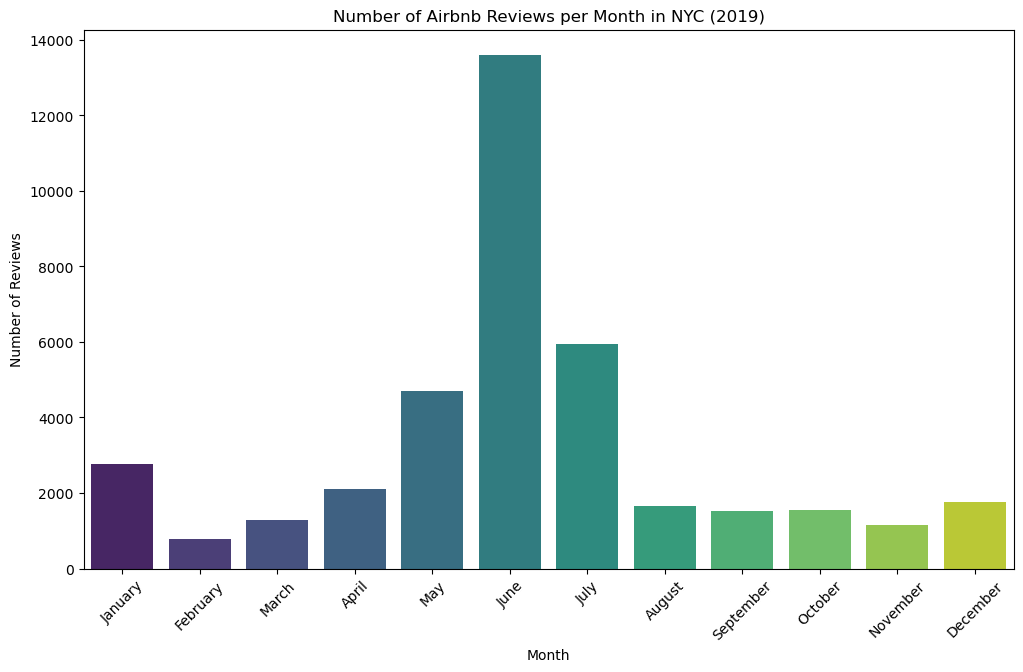

In [31]:
# plot
plt.figure(figsize=(12, 7))
sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis')
plt.title('Number of Airbnb Reviews per Month in NYC (2019)')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
#plt.savefig('busiest_months.png')
plt.show()

The bar chart shows a clear seasonal trend. The number of reviews peaks during the summer months, especially June and July.

There's a dip in the late winter/early spring months, which is expected

In [33]:
# handle extreme price outliers which can skew the visualization.
#  filter out listings that are more expensive than $500/night for a clearer view of the majority.
df_affordable = df[df['price'] < 500]

C:\Users\New\AppData\Local\Temp\ipykernel_25948\481004296.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='neighbourhood_group', y='price', data=df_affordable, palette='plasma')


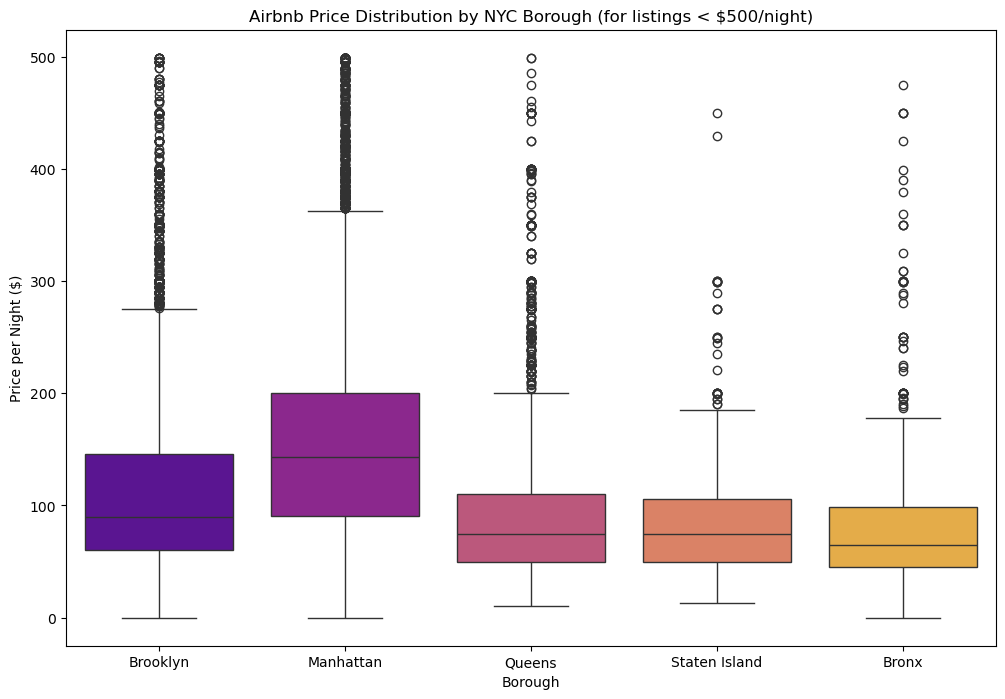

In [35]:
# create a boxplot to see the price distributions.
plt.figure(figsize=(12, 8))
sns.boxplot(x='neighbourhood_group', y='price', data=df_affordable, palette='plasma')
plt.title('Airbnb Price Distribution by NYC Borough (for listings < $500/night)')
plt.xlabel('Borough')
plt.ylabel('Price per Night ($)')
#plt.savefig('price_by_borough.png')
plt.show()

The box plot immediately highlights differences. Manhattan is clearly the most expensive borough, with the highest median price and the widest price range.

Brooklyn is the next most expensive.

The Bronx and Staten Island are the most affordable options. This visualization provides a clear and concise answer to the second question.